# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
place=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lon=[]
lat=[]
country=[]

for city in cities:
        response = requests.get(query_url + city).json()
        try:
            place.append(response["name"])
            temp.append(response["main"]["temp"])
            cloudiness.append(response["clouds"]["all"])
            humidity.append(response["main"]["humidity"])
            wind_speed.append(response["wind"]["speed"])
            lat.append(response["coord"]["lat"])
            lon.append(response["coord"]["lon"])
            country.append(response["sys"]["country"])
            print(response["name"]+" #"+str(response["id"])+" processed")
        except:
            print("Error")
    

Atuona #4020109 processed
Dikson #1507390 processed
Torbay #6167817 processed
Hofn #2630299 processed
Isangel #2136825 processed
Hasaki #2112802 processed
Bluff #2206939 processed
Error
Buala #2109528 processed
Zhuanghe #1784055 processed
Jamestown #5122534 processed
Error
Hermanus #3366880 processed
Mossamedes #3347019 processed
Saint-Philippe #935215 processed
Arraial do Cabo #3471451 processed
Tazovsky #1489853 processed
Sibolga #1213855 processed
Herat Province #1140025 processed
Vaini #4032243 processed
Belyy Yar #1510377 processed
Nago #1856068 processed
Error
Mandalgovi #2030065 processed
Tezu #1254709 processed
Error
Hithadhoo #1282256 processed
Long Beach #5367929 processed
Westport #4845585 processed
Palmer #4946620 processed
Laguna #5364271 processed
Kasempa #912628 processed
Barrow #5880054 processed
Ushuaia #3833367 processed
Atar #2381334 processed
Butaritari #2110227 processed
Khatanga #2022572 processed
Mariakani #187661 processed
Mar del Plata #3430863 processed
Avarua

Bengkulu #1649150 processed
Gurupi #3461724 processed
Ikom #2338242 processed
Bemidji #5017822 processed
Bansang #2413866 processed
Error
Te Anau #2181625 processed
Çan #749795 processed
Margate #2643044 processed
Northam #2641434 processed
Tilichiki #2120591 processed
Simao #1794209 processed
Error
Wau #363885 processed
Kemijärvi #653272 processed
Error
Portland #5746545 processed
Yenagoa #2318123 processed
Strezhevoy #1490796 processed
Ust-Tsilma #477940 processed
Aykhal #2027296 processed
Lincoln #5072006 processed
Coahuayana Viejo #4013679 processed
Saint George #5546220 processed
Kavieng #2094342 processed
Nadym #1498087 processed
Sanmenxia #1796669 processed
‘Āhuimanu #5856516 processed
Lerwick #2644605 processed
Yulara #6355222 processed
Champerico #3598787 processed
Henties Bay #3356832 processed
Kolda #2249782 processed
Saldanha #3361934 processed
Ulladulla #2145554 processed
Frederico Westphalen #3462956 processed
Error
Myitkyina #1307741 processed
Mankato #5036420 processed


Balaguer #3128978 processed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_check=pd.DataFrame({
        "City":place,
        "Temp":temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind Speed":wind_speed,
        "Latitude":lat,
        "Longitude":lon,
        "Country":country})

In [6]:
weather_check.to_csv("Output/weather_check.csv", index=False, header=True)
weather_check

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country
0,Atuona,79.50,73,99,15.10,-9.8000,-139.0333,PF
1,Dikson,29.14,97,100,6.24,73.5069,80.5464,RU
2,Torbay,50.00,71,75,18.41,47.6666,-52.7314,CA
3,Hofn,42.80,49,20,19.57,64.2539,-15.2082,IS
4,Isangel,72.75,60,27,13.00,-19.5500,169.2667,VU
...,...,...,...,...,...,...,...,...
559,Merano,68.00,42,0,9.22,46.6682,11.1595,IT
560,Kem',34.14,77,100,4.52,64.9555,34.5793,RU
561,Nena,75.04,89,73,4.03,11.7658,125.4178,PH
562,Kulhudhuffushi,84.18,73,70,8.21,6.6221,73.0700,MV


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_check.loc[(weather_check["Humidity"]>100)]

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

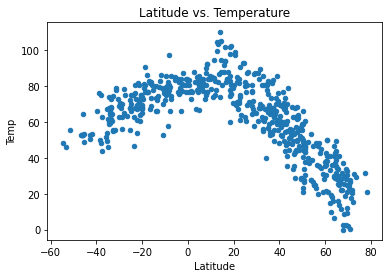

In [9]:
weather_check.plot.scatter(x="Latitude",y="Temp",title="Latitude vs. Temperature")

## Latitude vs. Humidity Plot

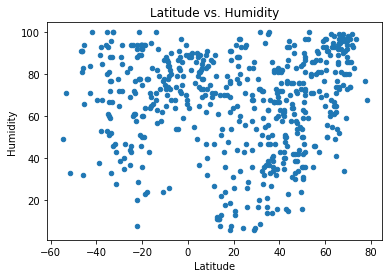

In [10]:
weather_check.plot.scatter(x="Latitude",y="Humidity",title="Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

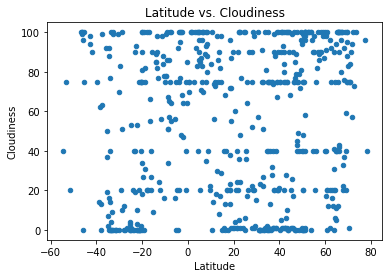

In [11]:
weather_check.plot.scatter(x="Latitude",y="Cloudiness",title="Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

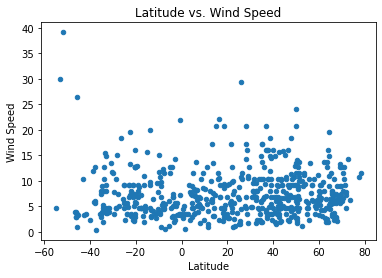

In [12]:
weather_check.plot.scatter(x="Latitude",y="Wind Speed",title="Latitude vs. Wind Speed")

## Linear Regression

In [13]:
N_hem=weather_check.loc[(weather_check["Latitude"]>0)]
S_hem=weather_check.loc[(weather_check["Latitude"]<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

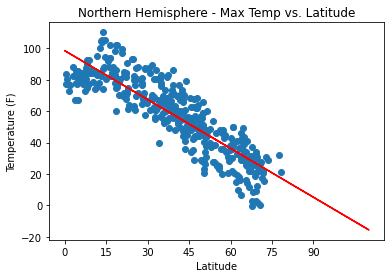

In [14]:
N_temp=N_hem.iloc[:,1]
N_lat=N_hem.iloc[:,5]
lats=[0,15,30,45,60,75,90]
NT_slope, NT_int, NT_r, NT_p, NT_std_err = linregress(N_lat,N_temp)
NT_fit = NT_slope * N_temp + NT_int
plt.scatter(N_lat,N_temp)
plt.plot(N_temp,NT_fit,"r-")
plt.xticks(lats)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

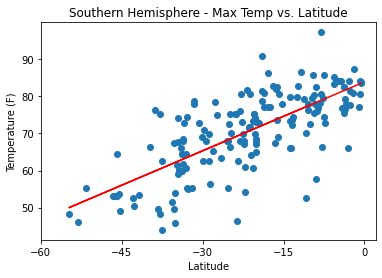

In [15]:
S_temp=S_hem.iloc[:,1]
S_lat=S_hem.iloc[:,5]
lats=[-60,-45,-30,-15,0]
ST_slope, ST_int, ST_r, ST_p, ST_std_err = linregress(S_lat,S_temp)
ST_fit = ST_slope * S_lat+ST_int
plt.scatter(S_lat,S_temp)
plt.plot(S_lat,ST_fit,"r-")
plt.xticks(lats)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

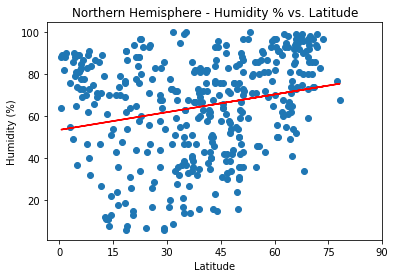

In [16]:
N_hum=N_hem.iloc[:,2]
N_lat=N_hem.iloc[:,5]
lats=[0,15,30,45,60,75,90]
NT_slope, NT_int, NT_r, NT_p, NT_std_err = linregress(N_lat,N_hum)
NT_fit = NT_slope * N_lat+NT_int
plt.scatter(N_lat,N_hum)
plt.plot(N_lat,NT_fit,"r-")
plt.xticks(lats)
plt.title("Northern Hemisphere - Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

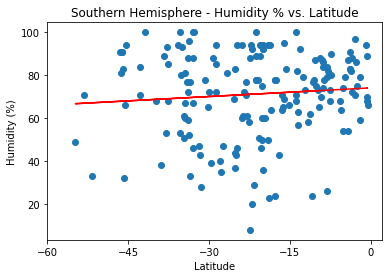

In [17]:
S_hum=S_hem.iloc[:,2]
S_lat=S_hem.iloc[:,5]
lats=[-60,-45,-30,-15,0]
ST_slope, ST_int, ST_r, ST_p, ST_std_err = linregress(S_lat,S_hum)
ST_fit = ST_slope * S_lat+ST_int
plt.scatter(S_lat,S_hum)
plt.plot(S_lat,ST_fit,"r-")
plt.xticks(lats)
plt.title("Southern Hemisphere - Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

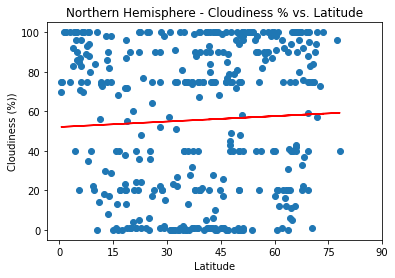

In [18]:
N_cloud=N_hem.iloc[:,3]
N_lat=N_hem.iloc[:,5]
lats=[0,15,30,45,60,75,90]
NT_slope, NT_int, NT_r, NT_p, NT_std_err = linregress(N_lat,N_cloud)
NT_fit = NT_slope * N_lat+NT_int
plt.scatter(N_lat,N_cloud)
plt.plot(N_lat,NT_fit,"r-")
plt.xticks(lats)
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

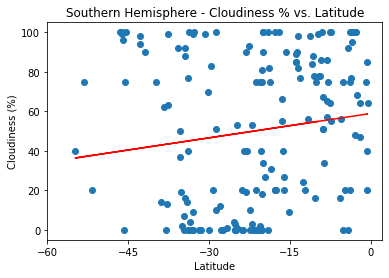

In [19]:
S_cloud=S_hem.iloc[:,3]
S_lat=S_hem.iloc[:,5]
lats=[-60,-45,-30,-15,0]
ST_slope, ST_int, ST_r, ST_p, ST_std_err = linregress(S_lat,S_cloud)
ST_fit = ST_slope * S_lat+ST_int
plt.scatter(S_lat,S_cloud)
plt.plot(S_lat,ST_fit,"r-")
plt.xticks(lats)
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

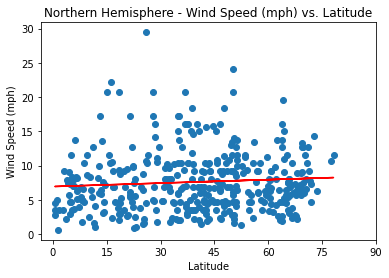

In [20]:
N_wind=N_hem.iloc[:,4]
N_lat=N_hem.iloc[:,5]
lats=[0,15,30,45,60,75,90]
NT_slope, NT_int, NT_r, NT_p, NT_std_err = linregress(N_lat,N_wind)
NT_fit = NT_slope * N_lat+NT_int
plt.scatter(N_lat,N_wind)
plt.plot(N_lat,NT_fit,"r-")
plt.xticks(lats)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

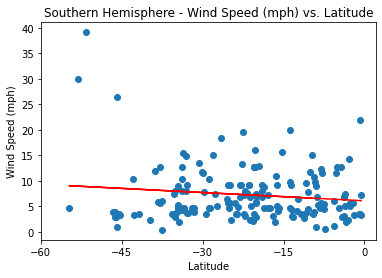

In [21]:
S_wind=S_hem.iloc[:,4]
S_lat=S_hem.iloc[:,5]
lats=[-60,-45,-30,-15,0]
ST_slope, ST_int, ST_r, ST_p, ST_std_err = linregress(S_lat,S_wind)
ST_fit = ST_slope * S_lat+ST_int
plt.scatter(S_lat,S_wind)
plt.plot(S_lat,ST_fit,"r-")
plt.xticks(lats)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()